# ML Ex0 - Corona Virus Data

Hi! 

Welcome to the dataset description for the [Corona Virus dataset](https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset) which we aim to dive into during the SS2020 Machine Learning course at TU Vienna (184.702). 


Team 12: Haddar Nesrine, Maryna Gutruf

In [4]:
## loading dependencies

import numpy as np 

import pandas as pd

import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

from pandas.plotting import scatter_matrix
import seaborn as sns

import os
import sys
sys.path.append('../')

%matplotlib inline

from config_ML import CORONA_VIRUS_DATA_PATH

## Why we use this data set

The coronavirus dataset has daily level information on the number of affected cases, deaths and recovery from 2019 novel coronavirus. It is a quite small, well described collection of real life data and invites to learn a lot of different and complex data analytics. We plan to use it for the regression exercise. This dataset is a good contrast to the XXXXX (our other) Dataset, which is much bigger and complexly. Last but not least coronavirus is so cutting-edge!

We start with reading the data into a data frame:

We count rows and columns of the dataframe in order to determine how many attributes (columns) and examples (rows) does it have

In [5]:
# we read the data of time_series_covid_19_data.csv into a Pandas DataFrame.

nRowsRead = None # specify 'None' if want to read whole file

df = pd.read_csv(CORONA_VIRUS_DATA_PATH, delimiter=',', nrows = nRowsRead, low_memory=False)

nRow, nCol = df.shape

print(f'There are {nRow} rows and {nCol} columns')

There are 8509 rows and 8 columns


We printed a sample of our Corona Virus dataframe to get familiar with dataset

In [6]:
## we do some initial format conversion to have real numeric data

df["ObservationDate"] = pd.to_datetime(df["ObservationDate"]) # string dates to datetime format
df["Last Update"] = pd.to_datetime(df["Last Update"]) # string dates to datetime format

df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


We created a statistical Summary so we could take a look at a summary of each attribute.
This includes the count, mean, the min and max values as well as some percentiles.

In [7]:
# descriptions
print(df.describe())

               SNo     Confirmed       Deaths     Recovered
count  8509.000000   8509.000000  8509.000000   8509.000000
mean   4255.000000    704.421201    25.542955    245.788342
std    2456.481054   5111.664699   252.402842   2774.093868
min       1.000000      0.000000     0.000000      0.000000
25%    2128.000000      2.000000     0.000000      0.000000
50%    4255.000000     18.000000     0.000000      0.000000
75%    6382.000000    140.000000     1.000000     10.000000
max    8509.000000  69176.000000  6820.000000  60324.000000


We use DataFrame.dtypes attribute to find out the data type of each column in the given dataframe

In [8]:
result = df.dtypes
print(result)

SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update        datetime64[ns]
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object


We determed Distribution of every attribute in order to figure out the number of instances (rows) that belong to each attribute. 

In [9]:
# 'SNo' distribution
#print(df.groupby('SNo').size())

In [10]:
# we deleted 'SNo' since it is ID of examples

df = df.drop(columns='SNo')

In [11]:
# 'ObservationDate' distribution
print(df.groupby('ObservationDate').size())

ObservationDate
2020-01-22     38
2020-01-23     46
2020-01-24     41
2020-01-25     44
2020-01-26     47
             ... 
2020-03-20    299
2020-03-21    304
2020-03-22    298
2020-03-23    295
2020-03-24    299
Length: 63, dtype: int64


In [12]:
# 'Province/State' distribution
print(df.groupby('Province/State').size())

Province/State
 Montreal, QC          10
 Norfolk County, MA     5
Alabama                12
Alameda County, CA      3
Alaska                 14
                       ..
Wyoming                15
Xinjiang               63
Yolo County, CA         4
Yunnan                 63
Zhejiang               63
Length: 289, dtype: int64


In [13]:
# 'Country/Region' distribution
print(df.groupby('Country/Region').size())

Country/Region
 Azerbaijan                        1
('St. Martin',)                    1
Afghanistan                       30
Albania                           16
Algeria                           29
                                  ..
Venezuela                         11
Vietnam                           62
Zambia                             7
Zimbabwe                           5
occupied Palestinian territory     7
Length: 205, dtype: int64


In [14]:
# 'Last Update' distribution
print(df.groupby('Last Update').size())

Last Update
2020-01-22 17:00:00     38
2020-01-23 17:00:00     46
2020-01-24 17:00:00     41
2020-01-25 17:00:00     44
2020-01-26 16:00:00     47
                      ... 
2020-03-21 23:13:17      7
2020-03-21 23:13:18     17
2020-03-21 23:43:02      3
2020-03-23 23:23:20    295
2020-03-24 23:41:50    299
Length: 1806, dtype: int64


In [15]:
# 'Confirmed' distribution
print(df.groupby('Confirmed').size())

Confirmed
0.0         195
1.0        1467
2.0         633
3.0         365
4.0         233
           ... 
67798.0       1
67799.0       1
67800.0       6
67801.0       1
69176.0       1
Length: 1061, dtype: int64


In [16]:
# 'Deaths' distribution
print(df.groupby('Deaths').size())

Deaths
0.0       5742
1.0        967
2.0        421
3.0        283
4.0        166
          ... 
4032.0       1
4825.0       1
5476.0       1
6077.0       1
6820.0       1
Length: 205, dtype: int64


In [17]:
# 'Recovered' distribution
print(df.groupby('Recovered').size())

Recovered
0.0        4464
1.0         853
2.0         328
3.0         165
4.0         195
           ... 
58382.0       1
58946.0       1
59433.0       1
59882.0       1
60324.0       1
Length: 648, dtype: int64


### Data Visualization

At this point we've got a basic idea about the Corona Virus & we needed to extend that with some visualizations.

We looked at two types of plots:

* Univariate plots in order to better understand each attribute.
* Multivariate plots in order to better understand the relationships between attributes.

###### Univariate Plots:

We ploted the distribution in confirmed cases for ‘Hong Kong’, ‘Beijing’, and ‘Shanghai’:

[('Diamond Princess cruise ship', 74), ('Gansu', 65), ('Hebei', 65), ('Anhui', 63), ('Beijing', 63), ('Chongqing', 63), ('Fujian', 63), ('Guangdong', 63), ('Guangxi', 63), ('Guizhou', 63), ('Hainan', 63), ('Heilongjiang', 63), ('Henan', 63), ('Hong Kong', 63), ('Hubei', 63), ('Hunan', 63), ('Inner Mongolia', 63), ('Jiangsu', 63), ('Jiangxi', 63), ('Jilin', 63), ('Liaoning', 63), ('Macau', 63), ('Ningxia', 63), ('Qinghai', 63), ('Shaanxi', 63), ('Shandong', 63), ('Shanghai', 63), ('Shanxi', 63), ('Sichuan', 63), ('Tianjin', 63), ('Xinjiang', 63), ('Yunnan', 63), ('Zhejiang', 63), ('New South Wales', 58), ('Victoria', 58), ('Tibet', 57), ('British Columbia', 57), ('Queensland', 55), ('South Australia', 53), ('Taiwan', 49), ('Los Angeles, CA', 38), ('San Benito, CA', 36), ('Santa Clara, CA', 35), ('Tempe, AZ', 35), ('Boston, MA', 34), ('Toronto, ON', 34), ('London, ON', 34), ('Madison, WI', 34), ('Orange, CA', 32), ('Chicago, IL', 30)]


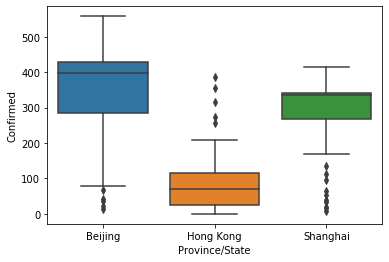

In [18]:
from collections import Counter
Counter(df['Province/State'].values)

# we drop missing values:
df.dropna(inplace=True)
print(Counter(df['Province/State'].values).most_common(50))

df = df[df['Province/State'].isin(['Hong Kong', 'Beijing', 'Shanghai'])]
sns.boxplot(x= df['Province/State'], y = df['Confirmed'])
plt.show()

We ploted the distribution in deaths cases for ‘Hong Kong’, ‘Beijing’, and ‘Shanghai’:

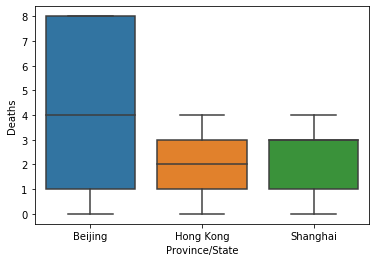

In [19]:
df = df[df['Province/State'].isin(['Hong Kong', 'Beijing', 'Shanghai'])]
sns.boxplot(x= df['Province/State'], y = df['Deaths'])
plt.show()

We ploted the distribution in Recovered cases for ‘Hong Kong’, ‘Beijing’, and ‘Shanghai’:

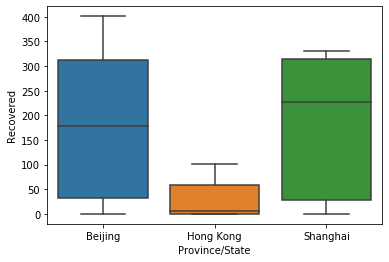

In [20]:
df = df[df['Province/State'].isin(['Hong Kong', 'Beijing', 'Shanghai'])]
sns.boxplot(x= df['Province/State'], y = df['Recovered'])
plt.show()

We created histogrsms and it looks like perhaps two of the input variables have a Gaussian distribution. This is useful to note as we can use algorithms that can explore this assumption.

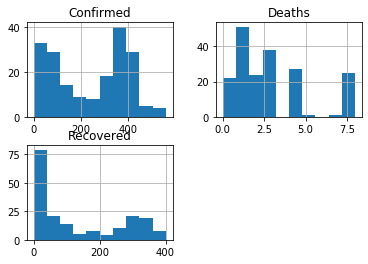

In [21]:
# histograms
df.hist()
plt.show()

##### Multivariate Plots

Than we looked at the interactions between the variables.

We first took a look at scatterplots of all pairs of attributes, since this can be helpful to spot structured relationships between input variables.

We noted the diagonal grouping of some pairs of attributes. This suggests a high correlation and a predictable relationship.

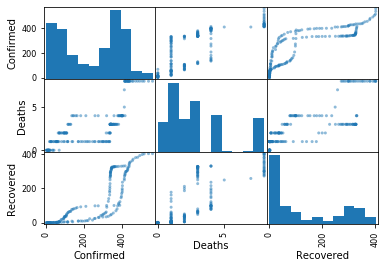

In [22]:
# scatter plot matrix
scatter_matrix(df)
plt.show()

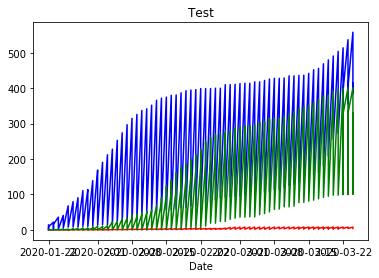

In [23]:
plt.plot(df['ObservationDate'], df['Confirmed'], 'b')
plt.plot(df['ObservationDate'], df['Deaths'], 'r')
plt.plot(df['ObservationDate'], df['Recovered'], 'g')
plt.xlabel('Date')
plt.title('Test')
plt.show()

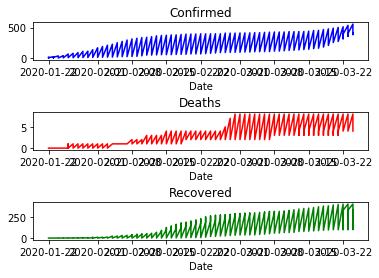

In [24]:
#plt.axes([0.05, 0.05, 0.425, 0.9])
plt.subplot(5,1,1)
plt.plot(df['ObservationDate'], df['Confirmed'], 'b')
plt.xlabel('Date')
plt.title('Confirmed')

#plt.axes([0.05,0.05, 0.425, 0.9])
plt.subplot(5,1,3)
plt.plot(df['ObservationDate'], df['Deaths'], 'r')
plt.xlabel('Date')
plt.title('Deaths')

#plt.axes([0.05,0.05, 0.425, 0.9])
plt.subplot(5,1,5)
plt.plot(df['ObservationDate'], df['Recovered'], 'g')
plt.xlabel('Date')
plt.title('Recovered')
plt.show()

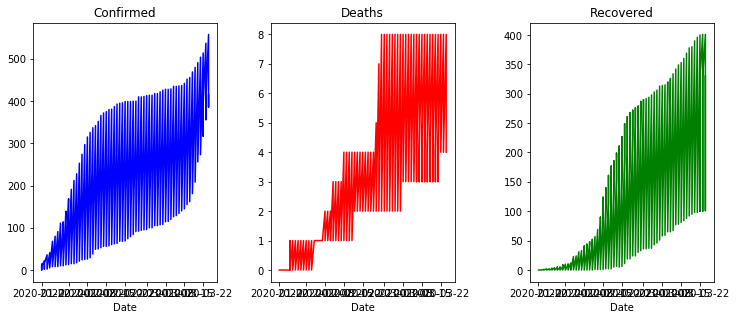

In [25]:
plt.axes([0.05, 0.05, 0.425, 0.9])
plt.plot(df['ObservationDate'], df['Confirmed'], 'b')
plt.xlabel('Date')
plt.title('Confirmed')

plt.axes([0.6,0.05, 0.425, 0.9])
plt.plot(df['ObservationDate'], df['Deaths'], 'r')
plt.xlabel('Date')
plt.title('Deaths')

plt.axes([1.2,0.05, 0.425, 0.9])
plt.plot(df['ObservationDate'], df['Recovered'], 'g')
plt.xlabel('Date')
plt.title('Recovered')
plt.show()